# Dual Momentum Sector Rotation (DMSR)

**Buy Signal**: When the S&P 500 is above its 10-month simple moving average, buy the sectors with the biggest gains over a three-month timeframe.

**Sell Signal**: Exit all positions when the S&P 500 moves below its 10-month simple moving average on a monthly closing basis.

**Rebalance**: Once per month, sell sectors that fall out of the top tier (three) and buy the sectors that move into the top tier (two or three).

https://school.stockcharts.com/doku.php?id=trading_strategies:sector_rotation_roc  
https://robotwealth.com/dual-momentum-review/  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
symbols = ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY']
#symbols = ['IWB', 'SPY', 'VGK', 'IEV', 'EWJ', 'EPP', 'IEF', 'SHY', 'GLD']
#symbols = ['SPY', 'TLT', 'NLY', 'GLD']

capital = 10000
start = datetime.datetime(1900, 1, 1)
#start = datetime.datetime.strptime(pf.SP500_BEGIN, '%Y-%m-%d')
end = datetime.datetime.now()
#end = datetime.datetime(2019, 1, 1)
# num months lookback
lookback = 3
top_tier = 2

use_cache = True
use_absolute_mom = True
use_regime_filter = True

Run Strategy

In [4]:
s = strategy.Strategy(symbols, capital, start, end, margin=1, lookback=lookback,
                      use_cache=use_cache, use_absolute_mom=use_absolute_mom,
                      use_regime_filter=use_regime_filter, top_tier=top_tier)
s.run()

Retrieve log DataFrames

In [5]:
rlog, tlog, dbal = s.get_logs()
stats = s.get_stats()

In [6]:
rlog.head()

,date,seq_num,price,shares,entry_exit,direction,symbol
0,2000-06-01,0,10.72,466,entry,LONG,XLF
1,2000-06-01,1,14.94,334,entry,LONG,XLP
2,2000-07-03,2,10.05,466,exit,LONG,XLF
3,2000-07-03,3,15.78,19,exit,LONG,XLP
4,2000-07-03,4,19.32,257,entry,LONG,XLE


In [7]:
tlog.tail()

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
297,2020-03-02,64.65,2020-04-01,51.65,-13.00,-26.00,2,19804.78,LONG,XLU
298,2020-07-01,104.66,2020-08-03,113.15,8.49,16.98,2,19821.76,LONG,XLK
299,2020-07-01,104.66,2020-08-21,117.94,13.28,1859.20,140,21680.96,LONG,XLK
300,2020-07-01,129.00,2020-08-21,146.18,17.18,1975.70,115,23656.66,LONG,XLY
301,2020-08-03,136.71,2020-08-21,146.18,9.47,9.47,1,23666.13,LONG,XLY


In [8]:
dbal.tail()

,high,low,close,shares,cash,leverage,state
date,,,,,,,
2020-08-17,33118.29,33118.29,33118.29,256,197.65,1.00,-
2020-08-18,33282.89,33282.89,33282.89,256,197.65,1.00,-
2020-08-19,33183.25,33183.25,33183.25,256,197.65,1.00,-
2020-08-20,33371.93,33371.93,33371.93,256,197.65,1.00,-
2020-08-21,33666.13,33666.13,33666.13,0,33666.13,1.00,X


Generate strategy stats - display all available stats

In [9]:
pf.print_full(stats)

start                                                   2000-05-26
end                                                     2020-08-21
beginning_balance                                            10000
ending_balance                                            33666.13
total_net_profit                                          23666.13
gross_profit                                              60710.14
gross_loss                                               -37044.01
profit_factor                                                 1.64
return_on_initial_capital                                   236.66
annual_return_rate                                            6.18
trading_period                           20 years 2 months 26 days
pct_time_in_market                                           68.05
margin                                                           1
avg_leverage                                                  1.00
max_leverage                                                  

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [10]:
benchmark = pf.Benchmark('SPY', capital, s.start, s.end, use_adj=True)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

2000-05-26 00:00:00 BUY  106 SPY @ 93.76
2020-10-09 00:00:00 SELL 106 SPY @ 346.99


Plot Equity Curves: Strategy vs Benchmark

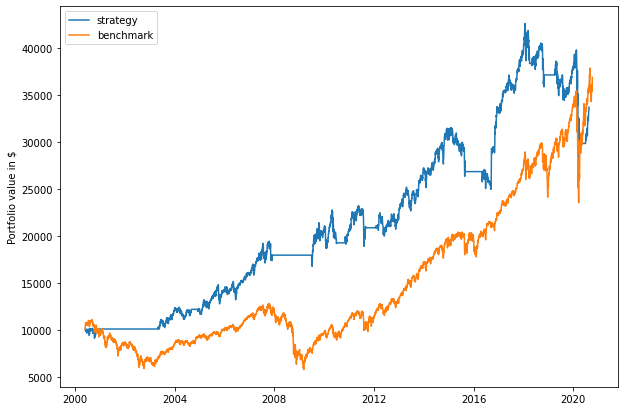

In [11]:
pf.plot_equity_curve(dbal, benchmark=benchmark.dbal)

Plot Trades

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,6.18,6.61
max_closed_out_drawdown,-37.51,-54.92
drawdown_annualized_return,-6.07,-8.31
drawdown_recovery,-2.15,-1.42
best_month,18.91,23.37
worst_month,-30.19,-30.93
sharpe_ratio,0.48,0.42
sortino_ratio,0.51,0.53
monthly_std,3.56,4.69
annual_std,11.53,16.48


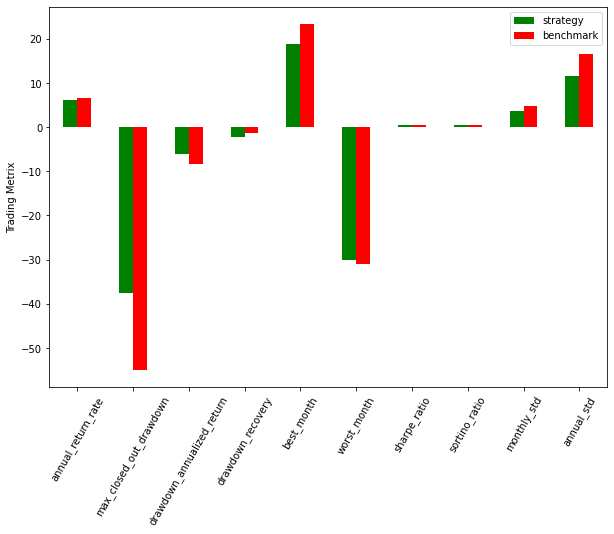

In [12]:
df = pf.plot_bar_graph(stats, benchmark.stats)
df